# **11장 차원축소, 잠재공간, 오토인코더**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 11.2 주성분을 추출해 이미지를 압축해 보자**

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분해 받자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                                fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [2]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

<Figure size 640x480 with 0 Axes>

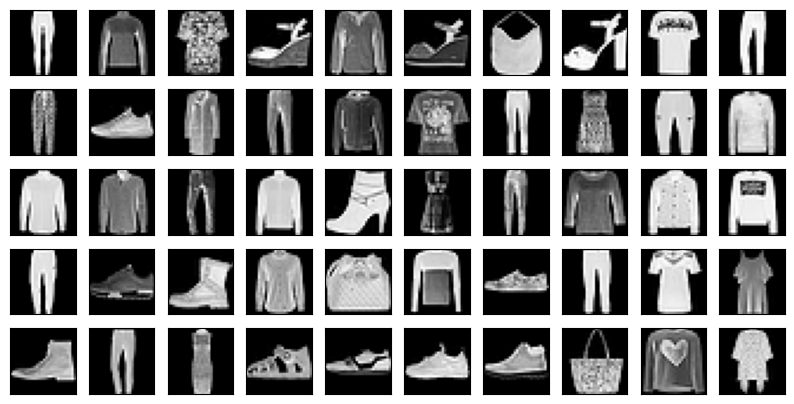

In [3]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

In [4]:
from sklearn.decomposition import PCA
train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 100)

train_reduced = pca.fit_transform(train_images_flat)

<Figure size 640x480 with 0 Axes>

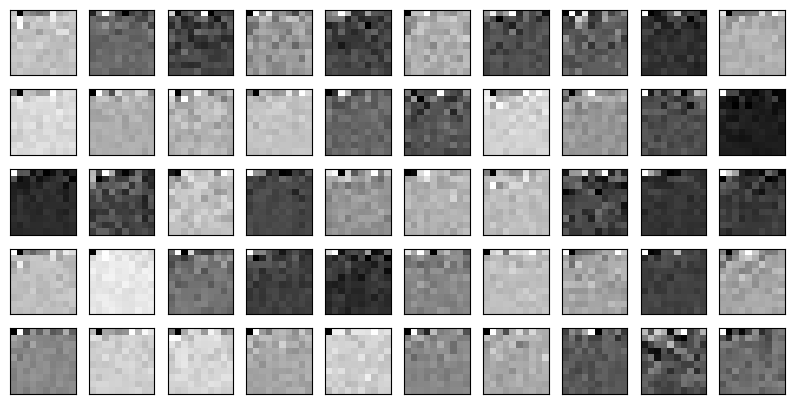

In [5]:
reduced_images = train_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

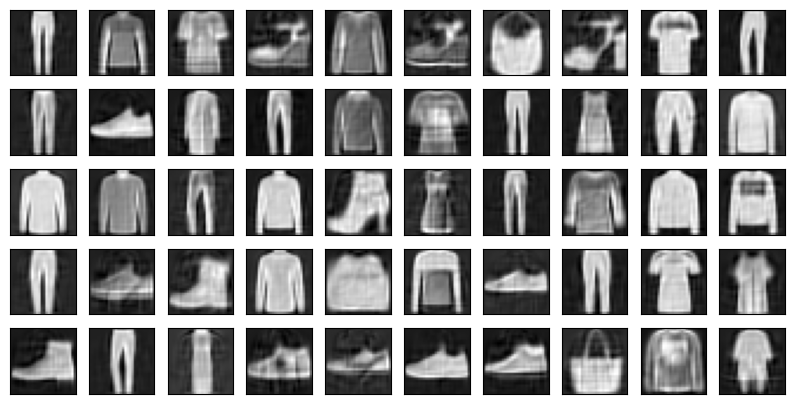

In [6]:
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

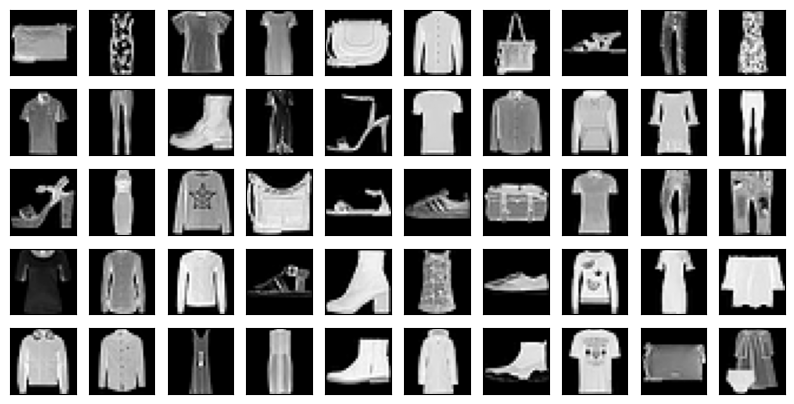

In [7]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 640x480 with 0 Axes>

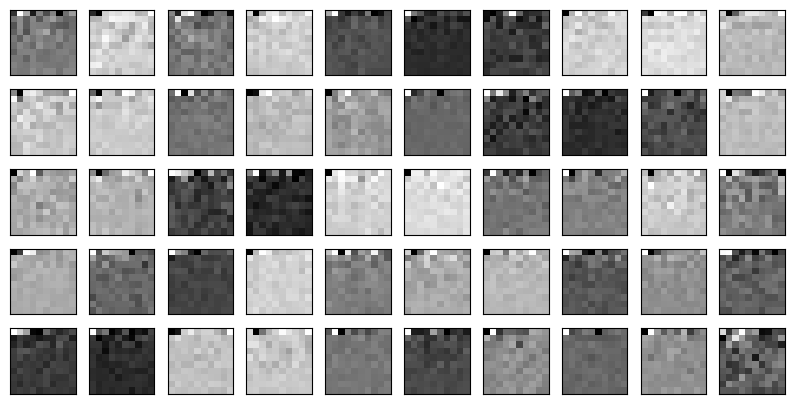

In [8]:
test_images_flat = test_images.reshape(-1, 28*28)
test_reduced = pca.fit_transform(test_images_flat)

reduced_images = test_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

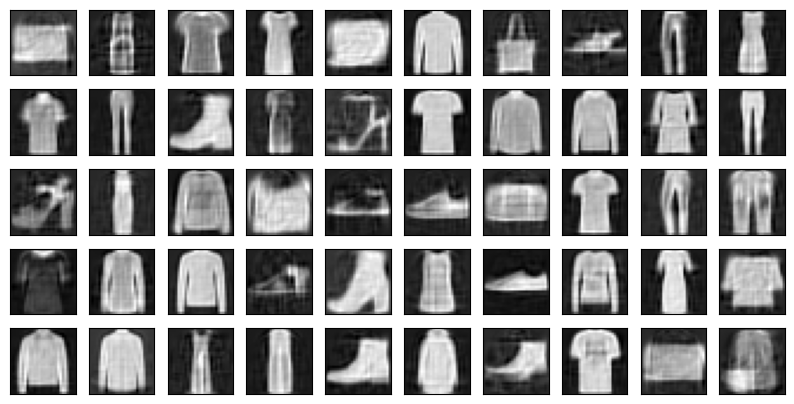

In [10]:
recovered_images = pca.inverse_transform(test_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

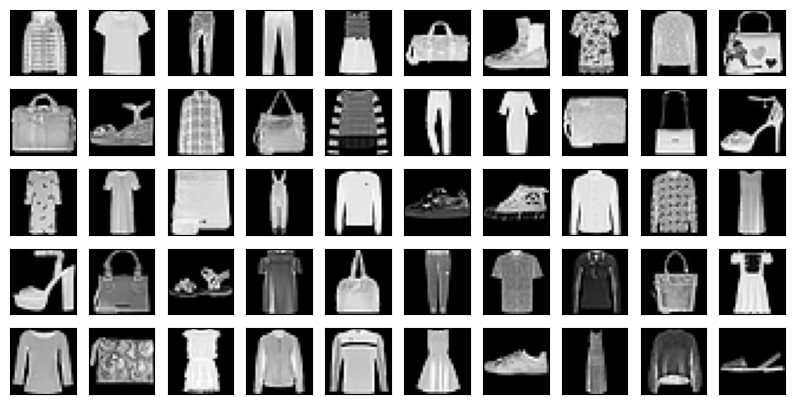

<Figure size 640x480 with 0 Axes>

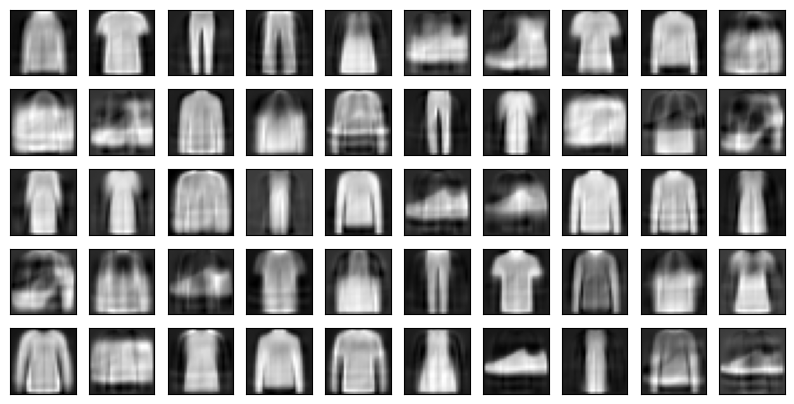

In [11]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 25)

train_reduced = pca.fit_transform(train_images_flat)
recovered_images = pca.inverse_transform(train_reduced)

recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])